### 12.03.16

Please answer the following questions and document your approach to each solution. If you are not able to provide a complete solution, please describe an approach that you would use to solve the problem. We are interested in creative solution and we spend at least as much time reviewing your thought process as we do the accuracy of the solution. We care about your approach to tackling a problem. Some of the problems are open ended, may not have a solution, or may need additional information to solve.



#### Problem 1:
A company has 20 employees who bring 15 laptops and 10 cell phones to work.  3 devices are selected at random, what is the probability that we pick 1 cell phone and 2 laptops? 


#### Answer:
This is a probability "drawing marbles out of a bag" type problem described by the hypergeometric distribution (I am assuming no replacement as it seems to be implied by the context). To solve this, I have 

$\dfrac{{\binom{10}{1}}  {\binom{15}{2}}} {\binom{25}{3}}$ 

Which is to say that there are a total ${\binom{25}{3}}$ of choosing 3 items from 25, 10 ways of choosing 1 cell phone from 10, and ${\binom{15}{2}}$ ways of choosing 2 laptops from 15. 

In [1]:
from scipy import misc as sc
sc.comb(10, 1) * sc.comb(15,2) / sc.comb(25,3)

0.45652173913043476

#### Problem 2:
A bag contains unknown number of tiles numbered in serial order 1, 2, 3... n. You draw 
k tiles from the bag without replacement and find the maximum number etched on them
to be m. What is your estimate of the number of tiles in the bag?

#### Answer:

Just thinking logically, my initial reaction to this question was that the best estimate would be m + some sort of adjustment. Obviosly m is biased lower since it is coming from inside of [1,n]. A natural adjustment would be based on the average "spread" of the numbers on the tiles I drew which would be $\dfrac{m}{k}$. Based on those thoughts, my initial guess would be ${m + \dfrac{m}{k}}$.

I recognize this is a discrete uniform distribution so I googled around and saw that the answer is actually 

${m + \dfrac{m-k}{k}}$ which is close to my initial guess only I didn't take out k from the range over which the "spread" was being calculated. 

I read through the "German Tank Problem" on Wikipedia to understand the derivation of the frequentist approach that I was intuitively drawn to as well as the Baysean approach but there is no need to restate those here. 

https://en.wikipedia.org/wiki/German_tank_problem#Minimum-variance_unbiased_estimator


#### Problem 3:
Outline an algorithm to find if two rectangles overlap. How would you compute the area if they overlap?

#### Answer:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

%matplotlib inline

In [3]:
#creating a quick set up to visualize the different arrangements random rectangles can take
def random_rect():

    a = np.random.randint(20,80,2)
    b = np.random.randint(20,80,2)

    orth_ab = np.array([a[1] - b[1], b[0] - a[0]])
    
    length = np.random.randint(20,50) #random length for the orthogonal side
    
    orth_ab = orth_ab * length / np.sqrt(np.dot(orth_ab, orth_ab)) #unitize orth and apply random length

    c = b + orth_ab
    d = a + orth_ab
    return [a, b, c, d]


def plot_2_rects(r1, r2):
    plt.figure(figsize=(8,8))
    plt.xlim(-20,120)
    plt.ylim(-20,120)
    plt.grid(True)
 
    for i in range(4):
        plt.plot(*zip(r1[i-1], r1[i]), color = "r", marker = "o")
        plt.plot(*zip(r2[i-1], r2[i]), color = "b", marker = "^")
    


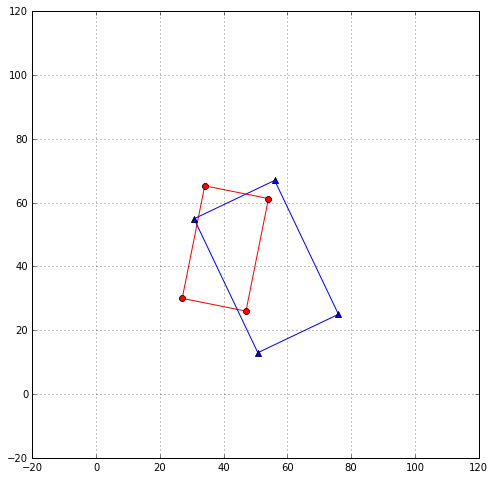

In [4]:
r1 = random_rect()
r2 = random_rect()
plot_2_rects(r1,r2)

Coding this would take a bit more time but the non-trivial part of the problem is finding the coordinates of the overlapping polygon. I think the following steps would achieve it. I was inspired by the Weiler–Atherton clipping algorithm (https://en.wikipedia.org/wiki/Weiler%E2%80%93Atherton_clipping_algorithm) hovewer I am tweaking it slightly in this case to handle the case where there are no inside vertices from either rectangle (for example a cross shape). The following algorithm considers r1 and r2 as defined below and returns the area of the overlap or none if there is no overlap:

rectangle 1 (r1) has corners going clockwise at (A,B,C,D) with coordinates Ax, Ay... etc

rectangle 2 (r2) has corners going clockwise at (E,F,G,H) ...

1. Label each corner of rectangle 1 and rectangle 2 in separate lists.
2. Test each corner of r1 for being inside of r2. If all 4 are inside, return area of r1. Do the same test for r2 corners being in r1.
    > (0<=AE⋅AB<=AB⋅AB)∧(0<=AE⋅AD<=AD⋅AD) is the most elegant "inside test" I found looking on stack exchange. In words, E is inside r1 if the perpendicular projection of the segment AE onto AB is positive and shorter than the length of AB and if the perpendicular projection of the segment AE onto AD is positive and shorter than the length of AD. AB and AD are perpendicular because its a rectangle. The soft inequality instead of the hard is needed to catch vertices that are on the perimeter of the other rectangle to capture the case of two identical aligned rectangles.
 
3. Test each side in r1 for intersection with each side in r2 and label and record the intersection points. If no intersecting points are found return None as there is no overlap.
4. Merge lists to find the subset of points that are the inside points and the intersections and these are the vertices of the intersecting polygon. 
5. Two overlapping convex polygons will make another convex polygon. Cycle through points clockwise to establish sides of the new polygon. Return the area of this polygon.
    > for an "area" algorithm, loop through pairs of adjacent vertices once, summing the cross product which would give double the area of the needed polygon. 
    
    > In pseudo code, (borrowed from stack exchange) assuming p is a list of inside points and vertices : 
    
    >def area(p):
    
    >return 0.5 * abs(sum(x0*y1 - x1*y0 for ((x0, y0), (x1, y1)) in segments(p)))
    
    >def segments(p):
    
    >return zip(p, p[1:] + [p[0]])
   

   
    
    

#### Problem 4: 
In each turn of a simulation, car A has a 10% chance of moving 5 feet forward, and a 90% chance of staying still. Similarly, in each turn of the simulation car B has a 60% chance of moving 1 foot forward, and a 40% chance of staying still. A race consists of however many turns in the simulation it takes to travel 100 feet. Write a simulation to run such a race, and run it 100 times. Count how many times car A wins and how many times car B wins. Do the numbers match up with what you would expect from a mathematical analysis of the problem?

#### Answer:

For car A, the expected forward move for each turn is 10% * 5 = .5 feet. With that, car A is expected to travel 100 feet in 100/.5 = 200 turns.

For car B, the expected forward move is .6 feet and car b is expected to travel 100 feet in ~167 turns.

A rough estimate would be just to say that B should win 167/200 = 83.5% of the time given their relative "speed".

For some reason, I got really stuck on this example in finding the exact mathematical solution to this problem. Maybe this is overcomplicating it but my first thought was to look at the ratio of the Bernoulli distributions. I was thinking that to get the exact result we would want to look at the ratio of the bernoulli probability mass functions with k = 20 successes, and probability of success p = .1 for car A and 100 sucesses, p =.6 for car B. 

$P(X = k)  = \binom{n}{k} * p^k * (p-1)^{(n-k)} $

So I wanted to solve 
$ \dfrac {Prob_B(X=100)} {Prob_A(X=20)}$ with the number of trials n being unknown but equal in both equations. Unfortunately this does not simplify and n does not drop off. 

The other idea I have is to look at a poisson distribution where the period is an unknown n number of steps. With n being defined as the number of steps until one of the cars wins. The lambda for each car would then be $n*p$ (number of trials times probability of forward move) and we would look at the ratio of winning probabilities where car A hit 20 sucesses or car B hit 100 successes in this period of n steps. In this case we have the following ratio: 

$ \dfrac {P_b(X=100)} {P_a(X=20)} = \dfrac {\dfrac {(.6*n)^{100}*e^{-.6*n}} {100!}}{\dfrac {(.1*n)^{20}*e^{-.1*n}} {20!}}$ 

Both of these ratios should be the same so I am guessing it is possible to derive the n from these two equations by setting them equal to each other and finding n which would be the expected number of steps for one of the cars to win the race. From there I could look at the ratio of probabilities of winning based on either the poisson or bernoulli probabilities. I am moving on in the interest of time but I will have to take a look at this problem closer.

Onto the simulation:

In [5]:
class racer(object):
    def __init__(self, prob, step, pos = 0):
        """Return a racer object whose probability distribution of go forward / stay still is a tuple 'prob',
        the step size is 'step', and the initial position 'pos' is by default set to 0"""
        self.prob = prob
        self.step = step
        self.pos = pos
        
    def turn(self):
        """draw a "stay still" (0) or "go forward" (1) according to the probability vector and update position"""
        self.pos += self.step * np.random.choice([0,1], 1, p = self.prob)
        
    def win(self):
        """flag true if won"""
        if self.pos >=100:
            return True

In [6]:
def raceAB():
    
    ''' initializes two racers and simulates one race returning the winner or a tie'''
    a = racer(prob = [.9, .1], step = 5)
    b = racer(prob = [.4, .6], step = 1)
    
    while not (a.win() or b.win()):
        a.turn()
        b.turn()
    if (a.win() and b.win()):
        return "tie"
    elif a.win():
        return "a"
    elif b.win():
        return "b"


In [7]:
import pandas as pd
results = pd.Series([raceAB() for i in range(100)])
results.value_counts()



b    85
a    15
dtype: int64

This result is close what I expected with the rough approximation but running larger number of races seems to suggests that the true ratio is around 75/25. I imagine the standard deviation of results is very high given the 5 step size. I am moving on in the interest of time but will take a closer look at this one when I have an opportunity.

#### Problem 5: 

A company provides following information about number of meetings in a conference room with 3, 4, 5, 6 and 7 employees. 


$
#Attendees
3
4
5
6
7
$
$
#Frequency
50
45
60
80
55
$


What is the mean and median of number of employees attending a meeting?  If you were to build TWO conference rooms to accommodate employees, what would be the size of each room? (Assume that a room of size x can accommodate at most x employees. Please specify any other assumptions you make regarding costs and scheduling to solve the problem.) 


#### Answer: 

In [8]:
att = [3,4,5,6,7]
freq = [50,45,60,80,55]
total_meetings = sum(freq)

total_people = reduce(lambda s, (x, y): s+ x*y, zip(att,freq) , 0)

mean = total_people/float(total_meetings)
print "Mean is: %.02f" % mean

total_meetings_mid = total_meetings/2.0


cumulative_meetings =  pd.DataFrame({"meetings":freq}, index = att).cumsum()

median = cumulative_meetings.index[cumulative_meetings.meetings < total_meetings_mid][-1]
#just a quick median find given this distribution not a comprehensive median function

print "Median is: %i" %median

Mean is: 5.16
Median is: 4


The second part is an optimization problem that requires a couple of assumptions. It is obvious that the first room has to be size 7 to accomodate the 7 person meetings. So the question becomes then about what size to make the second room to minimize cost but maximize utility measured by availatility of a suitable room.

1. Schedule efficiently, so a 4 person meeting will be scheduled to the 4 person room if a 6 person room is also available.
2. Meetings are a random draw from the frequency table provided. Draws are independent of each other, so if a 7 person meeting is booked to a certain time, there is the same chance of another 7 person meeting being requested for the same time.
3. Cost of running a meeting room is proportional to size. So a 6 person room is twice as expensive as a 3 person room.
4. Up front building costs are ignored.

Given the discrete nature of the problem, it is not necessary to go the full Lagrange optimization routine. It seems obvious to build a utility function to maximize based on some measures of occupancy rate and cost. Since I assume that the first room is going to have capacity 7. I know that the first meeting for any given time slot will be able to be booked. For the same time slot, whether the second meeting would be booked or not depends on if the size of the meeting is smaller than or equal to the size of the second room. Therefore, the chance of the second meeting being booked is cumulative probability of the attendance being smaller than capacity. I will use that as my "full_rate" variable. For cost, I subtract the percentage of the maximum cost that the 2 room arrangement is utilizing. The maximum cost here is 14 for two 7 person meeting rooms.


In [9]:
room_probs = pd.DataFrame({"capacity" : att, "cost" : att, "meetings":freq, "prob": np.array(freq)/float(sum(freq))})
max_rate = 7
alpha = 1 # a linear weight assigned to express the importance of cost versus full_rate variables in the model

room_probs["full_rate"] = room_probs.prob.cumsum()
room_probs["cost_rate"] = (room_probs.cost + max_rate) / (max_rate*2)
room_probs["utility"] = room_probs.full_rate - room_probs.cost_rate * alpha
room_probs

,capacity,cost,meetings,prob,full_rate,cost_rate,utility
0,3,3,50,0.172414,0.172414,0.714286,-0.541872
1,4,4,45,0.155172,0.327586,0.785714,-0.458128
2,5,5,60,0.206897,0.534483,0.857143,-0.322660
3,6,6,80,0.275862,0.810345,0.928571,-0.118227
4,7,7,55,0.189655,1.000000,1.000000,0.000000


In this rather simplistic example the two 7 person rooms maximize the utility. However, in this case occupancy and cost are weighed equally (alpha =1). If for example, occupancy rate is not that important relative to cost (for example, it is rare that people try to schedule for the same time and it is easy to just re-schedule) the result could be quite different. 

In [10]:
alpha = 3
room_probs["utility"] = room_probs.full_rate - room_probs.cost_rate * alpha
room_probs


,capacity,cost,meetings,prob,full_rate,cost_rate,utility
0,3,3,50,0.172414,0.172414,0.714286,-1.970443
1,4,4,45,0.155172,0.327586,0.785714,-2.029557
2,5,5,60,0.206897,0.534483,0.857143,-2.036946
3,6,6,80,0.275862,0.810345,0.928571,-1.975369
4,7,7,55,0.189655,1.000000,1.000000,-2.000000


In this example, a 6 or 3 person room is best with the 3 person room being actually slightly better due to the lower cost.

Even in this simple example results would depend on the definition of the utility function. The weights expressing relative importance could be exponential. Cost itself can have a non-linear relationship to capacity which would also change the result. If for example there was a 3 tiered cost structure we would have the below where the 6 person room would be the best pick.

In [11]:
max_rate = 10
alpha = 1
room_probs.cost = [1,5,5,5,max_rate]
room_probs["cost_rate"] = (room_probs.cost + max_rate) / (max_rate*2)
room_probs["utility"] = room_probs.full_rate - room_probs.cost_rate * alpha
room_probs

,capacity,cost,meetings,prob,full_rate,cost_rate,utility
0,3,1,50,0.172414,0.172414,0.55,-0.377586
1,4,5,45,0.155172,0.327586,0.75,-0.422414
2,5,5,60,0.206897,0.534483,0.75,-0.215517
3,6,5,80,0.275862,0.810345,0.75,0.060345
4,7,10,55,0.189655,1.000000,1.00,0.000000
